## Цель работы 
Исследовать функционирование и провести сравнительный анализ 
различных алгоритмов прямого поиска экстремума (пассивный поиск, метод 
дихотомии, золотого сечения, Фибоначчи) на примере унимодальной 
функции одного переменного.

## Постановка задачи 
На интервале $[a,b]$ задана унимодальная функция одного переменного $f(x)$. Используя методы последовательного поиска (дихотомии, золотого сечения и Фибоначчи), найти интервал нахождения минимума $f(x)$ при заданной наибольшей допустимой длине интервала неопределенности $\epsilon=0.1$. Провести сравнение с методом оптимального пассивного поиска. Результат, в зависимости от числа точек разбиения $N$, представить в виде таблицы.

## Практическая часть.


In [1]:
import numpy as np
import seaborn as sns
from typing import List, Tuple
from matplotlib import pyplot as plt
sns.set()

## Исходные данные для выполнения лабораторной работы

In [2]:
def f(x):
    return x*x*np.sin(x)

A = 9.0
B = 12.0
tolerance = 1e-1

## Метод пассивного поиска

### Подготовка данных

In [3]:
step = tolerance / 2
points = np.arange(A + step, B, step)
values = f(points)

print("Amount of points N = {0}".format(len(points)))

Amount of points N = 59


In [4]:
min_x = points[values.argmin()]
min_y = values.min()

### Визуализация расчётов

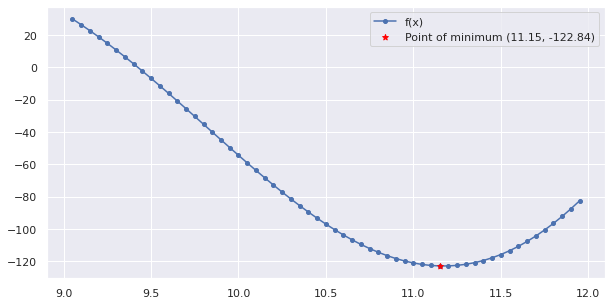

In [5]:
data = {"x": points, "f(x)": values}
plt.figure(figsize=[10, 5])
plt.plot("x", "f(x)", "bo-", markersize=4, data=data)
plt.scatter(min_x, 
            min_y, 
            c="red", 
            marker="*",
            zorder=3, 
            label="Point of minimum ({0:.2f}, {1:.2f})".format(min_x, min_y))
plt.annotate
plt.legend()
plt.show()

## Метод Фибоначчи

### Подготовка данных

In [6]:
def GenerateFibSequence(a: float, b: float, tolerance: float) -> Tuple[List[float], int]:
  fib = list((1, 1))
  distance = b - a

  i = 1
  while (distance / fib[i] > tolerance):
    i += 1
    fib.append(fib[i - 2] + fib[i - 1])
  
  return tuple((fib, i))

In [7]:
fib, N = GenerateFibSequence(A, B, tolerance)
print("Amount of points N = {0}".format(N + 1))

Amount of points N = 9


### Последовательный поиск

In [8]:
points = []
values = []
subintervals = [(A, B)]
for i in range(1, N):
  lhs, rhs = subintervals[i - 1][0], subintervals[i - 1][1]
  distance = rhs - lhs

  x1 = fib[N - i - 1] / fib[N - i + 1] * distance + lhs
  x2 = fib[N - i] / fib[N - i + 1] * distance + lhs

  points.append(x1)
  points.append(x2)

  y1 = f(x1)
  y2 = f(x2)

  values.append(y1)
  values.append(y2)

  if y1 < y2:
    subintervals.append((lhs, x2))
  else:
    subintervals.append((x1, rhs))

#### Визуализация расчётов

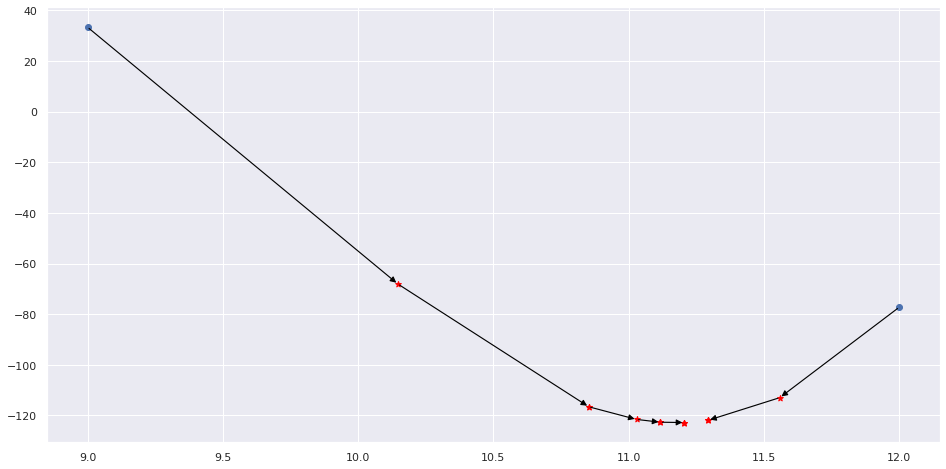

In [9]:
data = {"x": points, "f(x)": values}
plt.figure(figsize=[16, 8])

plt.scatter((A, B), (f(A), f(B)))
plt.scatter(points, values, c="red", marker="*")

for i in range(1, len(subintervals)):
  if subintervals[i][0] == subintervals[i - 1][0]:
    curr = subintervals[i][1]
    prev = subintervals[i-1][1]
  else:
    curr = subintervals[i][0]
    prev = subintervals[i-1][0]
  xy = (curr, f(curr))
  xytext = (prev, f(prev))
  plt.annotate("", 
               xy=xy,
               xytext=xytext, 
               arrowprops={'arrowstyle': '-|>', 'lw': 1.15, 'color': 'black'}
               )

plt.show()

In [10]:
closure = subintervals[len(subintervals) - 1]
print("Final subinterval: [{0:.2f}, {1:.2f}]".format(closure[0], closure[1]))

Final subinterval: [11.21, 11.29]


## Вывод
В ходе  проделанной  работы  был  получен  навык фомирования и решения задачи поиска экстремума унимодальной функции одного переменного с помощью пассивного поиска и метода Фибоначчи.